In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, class_sep=2, random_state=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
modelo = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
modelo.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

In [5]:
y_pred = modelo.predict(X_test)
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")

Precisión del modelo: 0.97


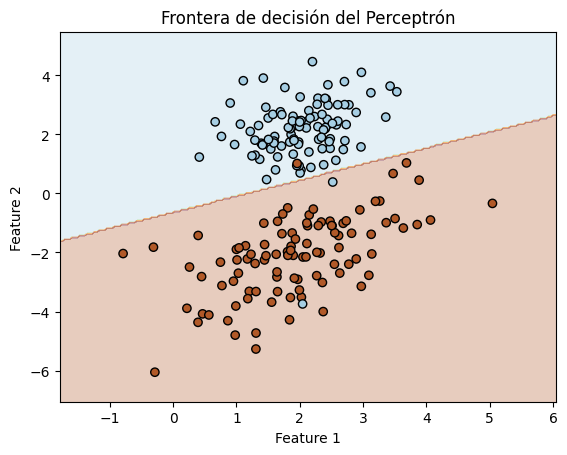

In [6]:
def graficar_frontera(X, y, modelo):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title("Frontera de decisión del Perceptrón")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

graficar_frontera(X, y, modelo)